In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import matplotlib as plt

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#combining Title and description

train_data['text'] = train_data['Title'] + ' ' + train_data['Description']
test_data['text'] = test_data['Title'] + ' ' + test_data['Description']

#removing unnecessary columns
train_data = train_data.drop(columns = ['Title', 'Description'])
test_data = test_data.drop(columns = ['Title', 'Description'])

In [ ]:
#checking updated data
train_data

,Class Index,text
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."
...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...
119996,2,Renteria signing a top-shelf deal Red Sox gene...
119997,2,Saban not going to Dolphins yet The Miami Dolp...
119998,2,Today's NFL games PITTSBURGH at NY GIANTS Time...


In [ ]:
#reducing sample size to reduce computational expense
from sklearn.model_selection import train_test_split

train_data_, _ = train_test_split(train_data, test_size = 0.5, stratify= train_data['Class Index'], random_state = 42)

test_data_, _ = train_test_split(test_data, test_size = 0.5, stratify= test_data['Class Index'], random_state = 42)

In [ ]:
train_data_

,Class Index,text
12742,4,New Windows Planned for 2006 Microsoft Corp. a...
88402,1,Intel's President Is Promoted to C.E.O. The pr...
36154,1,Pentagon Expands Outposts in Middle East WASHI...
45502,3,"Nortel Cuts Fewer Jobs, Exits Real Estate OTT..."
79628,2,"Vijay Swings to \$10 m kitty Vijay Singh, Fiji..."
...,...,...
56728,2,"As promised, party was quite subdued FOXBOROUG..."
112030,2,"No. 1 Illinois 74, Georgetown 59 WASHINGTON - ..."
9023,1,The first Guantanamo trials are set to take pl...
82379,4,E-gold Tracks Cisco Code Thief The electronic ...


<ipython-input-56-07da6f021296>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data_ , x = 'Class Index', palette = {'1':'blue', '2': 'red', '3':'pink', '4':'yellow'} )


Text(0.5, 1.0, 'Train Data')

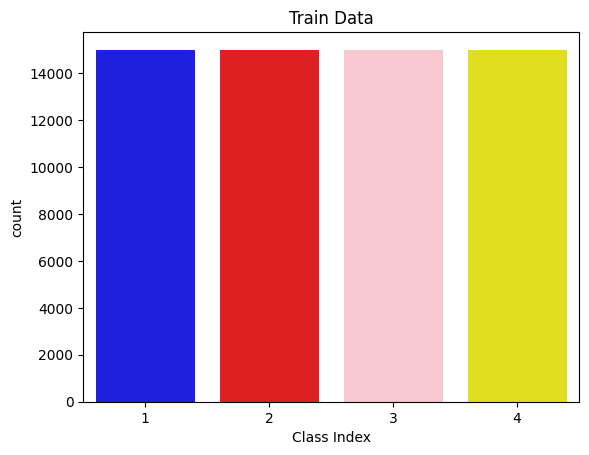

In [ ]:
#check class balance

import seaborn as sns

sns.countplot(data = train_data_ , x = 'Class Index', palette = {'1':'blue', '2': 'red', '3':'pink', '4':'yellow'} )
py.title('Train Data')


<ipython-input-54-e157148dc115>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = test_data_, x = 'Class Index', palette = {'1':'blue', '2': 'red', '3':'pink', '4':'yellow'})


Text(0.5, 1.0, 'Test Data')

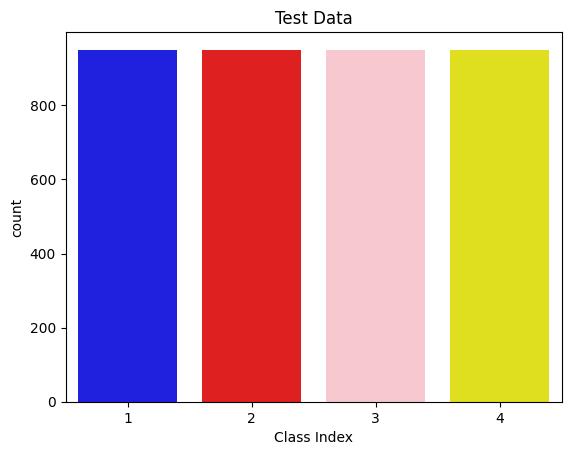

In [ ]:
sns.countplot(data = test_data_, x = 'Class Index', palette = {'1':'blue', '2': 'red', '3':'pink', '4':'yellow'})
py.title('Test Data')


In [ ]:

#separation of labels and features

train_label_ = []
train_label_ = pd.DataFrame(train_label_)
train_label_['Class Label'] = train_data_['Class Index']
train_label_ = pd.DataFrame(train_label_)
train_label_ = train_label_.rename(columns = {'Class Index': 'Class Label'})

test_label_ = []
test_label_ = pd.DataFrame(test_label_)
test_label_['Class Label'] = test_data_['Class Index']
test_label_ = pd.DataFrame(test_label_)
test_label_ = test_label_.rename(columns = {'Class Index': 'Class Label'})

In [ ]:
train_label_

,Class Label
12742,4
88402,1
36154,1
45502,3
79628,2
...,...
56728,2
112030,2
9023,1
82379,4


In [ ]:
test_label_

,Class Label
3233,1
7312,1
4282,1
748,4
3227,4
...,...
4193,2
5756,3
4953,2
4237,2


In [ ]:

contractions_dict = {
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mightn't": "might not",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "we'd": "we would",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "ain't": "is not",
    "c'mon": "come on",
    "gimme": "give me",
    "gonna": "going to",
    "gotta": "got to",
    "lemme": "let me",
    "ma'am": "madam",
    "o'clock": "of the clock",
    "ol'": "old",
    "should've": "should have",
    "that'd": "that would",
    "there'd": "there would",
    "there'll": "there will",
    "this's": "this is",
    "wasn't": "was not",
    "we'll": "we will",
    "when's": "when is",
    "where'd": "where did",
    "who've": "who have",
    "why's": "why is",
    "y'all": "you all",
    "could've": "could have",
    "would've": "would have",
    "must've": "must have",
    "needn't": "need not",
    "might've": "might have",
    "how's": "how is"
}

import re

def preprocess_text(column, contractions = contractions_dict):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(k) for k in contractions.keys()) + r')\b')
    processed = []
    for value in column:
        text = value.lower()

        text= pattern.sub(lambda match: contractions[match.group(0)], text) #this particular line allows the pattern to access the corresponding expansions and then substitute them into the text
        processed.append(text)

    return processed




In [ ]:
train_data_['text'] = train_data_['text'].apply(preprocess_text)

test_data_['text'] = test_data_['text'].apply(preprocess_text)

In [ ]:
train_data_ = train_data_.reset_index(drop = True)
test_data_ = test_data_.reset_index(drop = True)

train_label_ = train_label_.reset_index(drop = True)
test_label_ = test_label_.reset_index(drop = True)


In [ ]:
#exporting to a CSV file to avoid having to redo preprocessing
train_data_.to_csv('preprocessed_train_data.csv', index = True)
test_data_.to_csv('preprocessed_test_data.csv', index = True)

train_label_.to_csv('preprocessed_train_label.csv', index = True)
test_label_.to_csv('preprocessed_test_label.csv', index = True)